In [3]:
from utils import *

In [22]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

Here, you need to specify the countries whose currency images are to be collected:

### Collect images

In [2]:
countries = ['Tunisian', 'Indian', 'Japanese']
#country = 'India'

Here, I have set some words that mean banknotes and currencies, you can add yours if you want.
Note that these keywords are the default ones, so if you haven't added any, you don't need to run this cell.

In [3]:
m_words = ['banknote', 'money bill', 'currency'] 

You need to specify where your __chromedriver__ location is.
If you don't know what us __chromedriver__, please take a look __[here](http://chromedriver.chromium.org/)

In [4]:
chrome_driver_dir = "C:\\Program Files (x86)\\Google\\Chrome\\Application\\chromedriver.exe"

In [5]:
set_chromedriver(chrome_driver_dir)

In [6]:
output_dir = "downloads\\currencies"

Here are some other parameters that we can adjust, namely the number of images to collect, whether you want the URLs of the images to be printed or not.
More parameters related to this crawler can be found __[here](https://github.com/hardikvasa/google-images-download)__. However, they only these two have been taken into account in the functions in *utils.py*

In [7]:
limit = 20
print_urls = False

Start the collection here:

In [8]:
collect_multi_banknote_images(countries, limit, output_dir, print_urls, m_words)
# collect_banknote_images(country, limit, output_dir, print_urls, m_words)


Item no.: 1 --> Item name = Tunisian banknote
Evaluating...
Starting Download...
Completed Image ====> 1. tn70.jpg
Completed Image ====> 2. tunisia-8.jpg
Completed Image ====> 3. tunisia-74.jpg
Completed Image ====> 4. billetes.png
Completed Image ====> 5. tunisia_bct_20_dinars_2017.07.26_b537a_pnl_e-1_2260364_f.jpg
Completed Image ====> 6. tunisia_bct_10_dinars_2013.03.20_b35a_pnl_d-1_9385421_f.jpg
Completed Image ====> 7. tunisiapnew5178.jpg
Completed Image ====> 8. tunisia-62.jpg
Completed Image ====> 9. tn91.jpg
Completed Image ====> 10. tunisia_50_d_2011.03.20_pnl_g_1_0246519_f.jpg
Completed Image ====> 11. tunisia-57.jpg
Completed Image ====> 12. tn24.jpg
Completed Image ====> 13. smalltunisiahalfdinarp69.jpg
Completed Image ====> 14. tunisia_bct_20_dinars_2017.07.26_b537a_pnl_e-1_2260364_r.jpg
Completed Image ====> 15. s-l300.jpg
Completed Image ====> 16. maxresdefault.jpg
Completed Image ====> 17. approach-to-tunisian-banknote-five-dinars-european-banknote-fifty-euro-backdrop-

Completed Image ====> 6. japan-money-3.jpg
Completed Image ====> 7. img_intro02.jpg
Completed Image ====> 8. 1-japanese-yen-banknote-ninomiya-sontoku-obverse.jpg
Completed Image ====> 9. 1000-japanese-yen-banknote-hirobumi-ito-obverse-1.jpg
Completed Image ====> 10. japan-money-4.jpg
Completed Image ====> 11. latest?cb=20111016035806.jpg
Completed Image ====> 12. jp89.jpg
Completed Image ====> 13. 08ede1c9e3be0892b76c55ad7c2765c8.gif
Completed Image ====> 14. 53651.jpg
Completed Image ====> 15. jp104.jpg
Completed Image ====> 16. 220px-japan-10-constitutional_monarchy-one_yen_%281873%29.jpg
Completed Image ====> 17. 9c77c758db959c65543f84a021241f9d.jpg
Completed Image ====> 18. 10000-japanese-yen-banknote-yukichi-fukuzawa.jpg
Completed Image ====> 19. japanese-5-yen-banknote-front-issued-1946.png
Completed Image ====> 20. japanese%2bcurrency%2b1000%2byen%2bnote%2b2004.jpg

Errors: 0


Item no.: 1 --> Item name = Japanese money bill
Evaluating...
Starting Download...
Completed Image ===

Alternatively, you can specify only some of the parameters in here:

In [ ]:
# collect_multi_banknote_images(countries=countries, num_images=limit, download_dir = output_dir, print_urls = print_urls, m_words = m_words)
# collect_banknote_images(country=country, num_images=limit, download_dir = output_dir, print_urls = print_urls, m_words = m_words)

### Clean Images

In a first step, we are going to rename all the files inside each folder to a number:

In [2]:
clean_folder_names('Tunisian')

It is a good idea now to go and manually check the images.. remove the images that don't fit to our application

### Augment Images"

Augmenting the images is pretty simple, first let's take a look at a sample image:

In [23]:
file = output_dir + '\\Tunisian\\' + random.choice(os.listdir(output_dir + '\\Tunisian'))

In [24]:
img = cv2.imread(file)

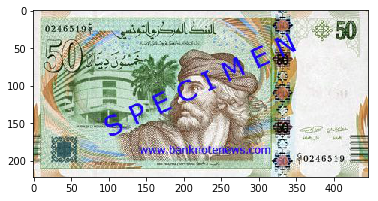

In [26]:
plt.imshow(img)

In [34]:
height, width, ch = img.shape
height, width, ch

(222, 446, 3)

In [35]:
type(height)

int

In [107]:
pts1 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

In [128]:
pts2 = np.float32([[30, 0], [width, 0], [0, height], [width-30, height]])

In [129]:
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(img, matrix, (width, height))

In [130]:
print(matrix)

[[ 9.32735426e-01 -1.35135135e-01  3.00000000e+01]
 [ 7.97972799e-16  1.00000000e+00 -3.07309733e-13]
 [ 1.07607066e-17  2.59937471e-17  1.00000000e+00]]


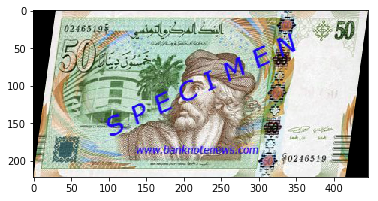

In [131]:
plt.imshow(result)